In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../../data/atec_anti_fraud_train.csv')

In [3]:
data1 = data[data['label']==1]
cate_feat = ['f1', 'f2', 'f3', 'f4', 'f6', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 
             'f18', 'f19', 'f59', 'f60', 'f157', 'f166', 'f167', 'f168', 'f186', 'f194', 'f199', 'f254', 'f272']
conti_feat = ['f5', 'f7', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 
              'f34', 'f35', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f61', 'f62', 'f63', 
              'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 
              'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 
              'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 
              'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 
              'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137',
              'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 
              'f152', 'f153', 'f154', 'f155', 'f156', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f169', 
              'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 
              'f184', 'f185', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f195', 'f196', 'f197', 'f198', 'f200', 
              'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 
              'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 
              'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 
              'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f255', 'f256', 'f257', 
              'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 
              'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 
              'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297']


In [8]:
# 离散特征分析
def cate_feat_analyze(df, feat_name, time1, time2):
    min_ = int(df[feat_name].min())
    max_ = int(df[feat_name].max())
    len_perid1 = df[df['date']<time1].shape[0]
    len_perid2 = df[(df['date']>=time1)&(df['date']<time2)].shape[0]
    perid1 = []
    perid2 = []
    subjects = []
    for i in range(min_, max_+1):
        num1 = df[(df[feat_name]==i)&(df['date']<time1)].shape[0]/len_perid1
        num2 = df[(df[feat_name]==i)&(df['date']>=time1)&(df['date']<time2)].shape[0]/len_perid2
        perid1.append(num1)
        perid2.append(num2)
        subjects.append('cate_val_{}'.format(i))
    # 加一个判断
    assert sum(perid1)-1 < 1e-6 
    assert sum(perid2)-1 < 1e-6
        
    scores = [perid1, perid2]
    # 画直方图
    font_size = 10 # 字体大小  
    fig_size = (8, 6) # 图表大小
    names = ('20170905-{}'.format(time1), '{}-{}'.format(time1, time2))  
    # 更新图表大小  
    mpl.rcParams['figure.figsize'] = fig_size  
    # 设置柱形图宽度  
    bar_width = 0.30  

    index = np.arange(len(scores[0]))  
    # 绘制正样本
    rects1 = plt.bar(index, scores[0], bar_width, color='#0072BC', label=names[0])  
    # 绘制负样本 
    rects2 = plt.bar(index + bar_width, scores[1], bar_width, color='#ED1C24', label=names[1])  
    # X轴标题  
    plt.xticks(index+bar_width/2, subjects)  
    # Y轴范围 
    plt.ylim(ymax=1, ymin=0)  
    # 图表标题  
    plt.title(feat_name)  
    # 图例显示在图表下方  
    plt.legend(loc='upper right', fontsize=15)  
    '''
    # 添加数据标签  
    def add_labels(rects):  
        for rect in rects:  
            height = rect.get_height()  
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')  
            # 柱形图边缘用白色填充，纯粹为了美观  
            rect.set_edgecolor('white') 
    add_labels(rects1)  
    add_labels(rects2) 
    '''
    plt.show()  
    return np.abs(np.asarray(perid1)-np.asarray(perid2))

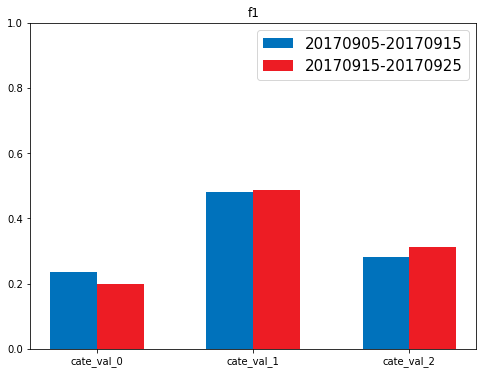

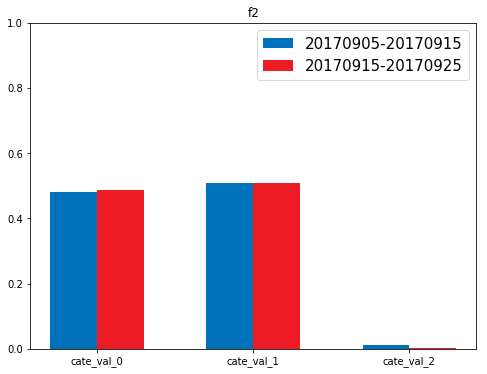

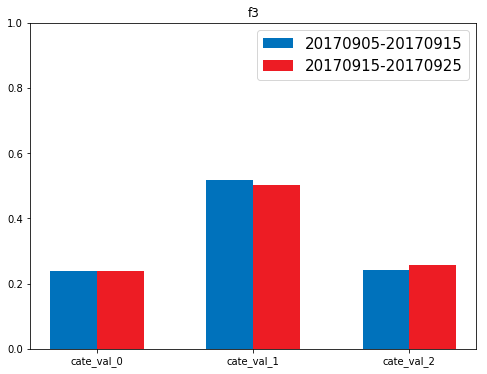

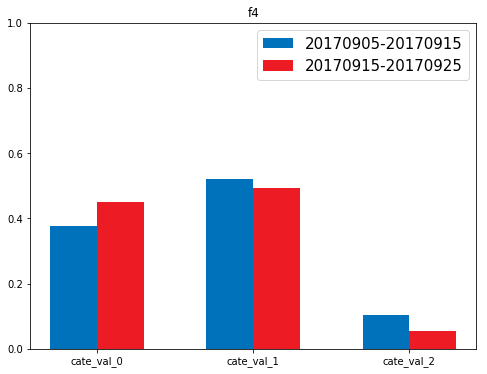

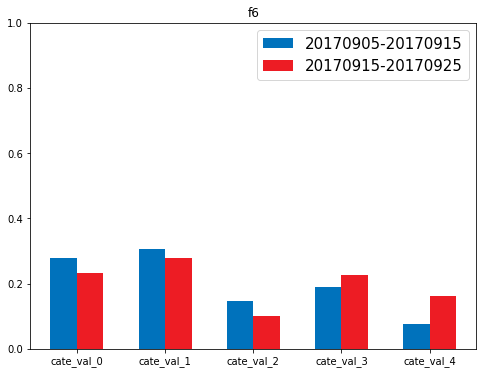

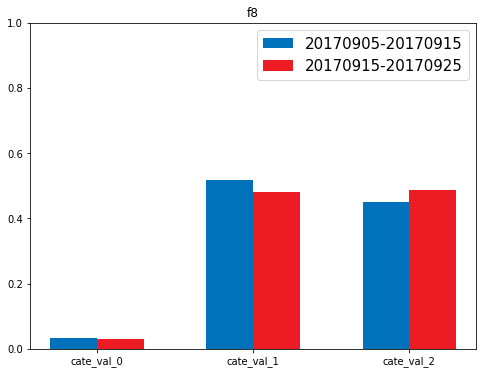

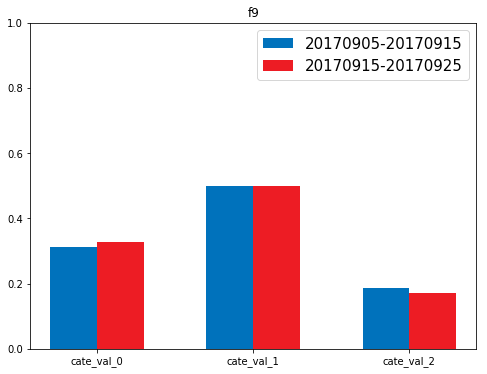

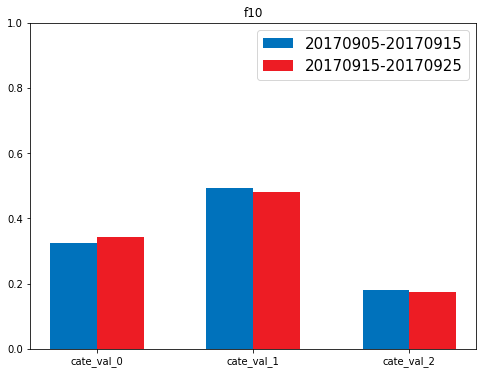

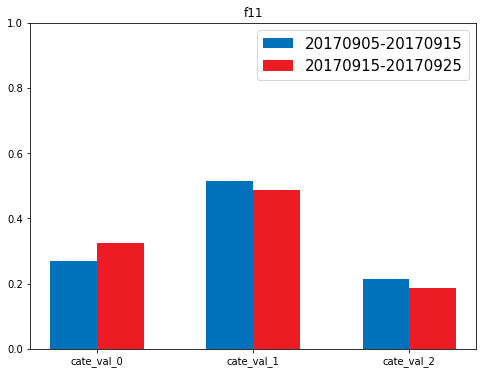

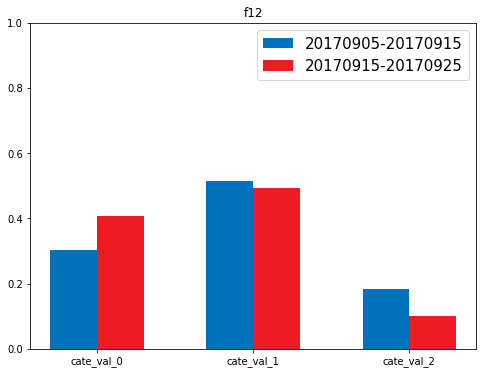

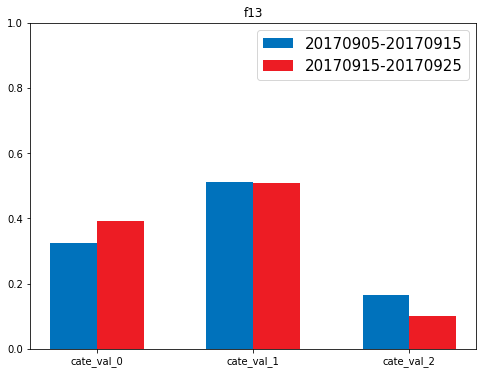

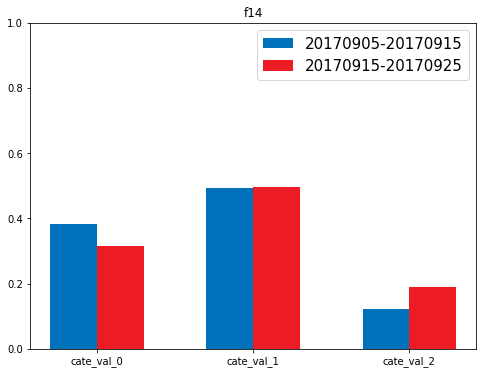

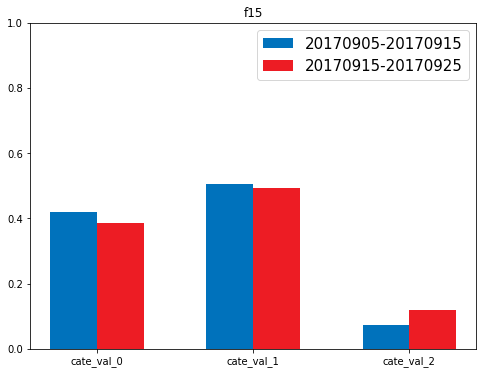

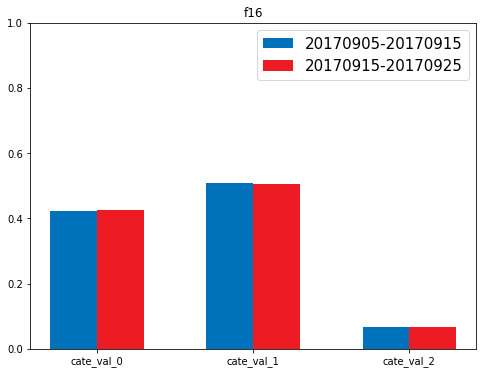

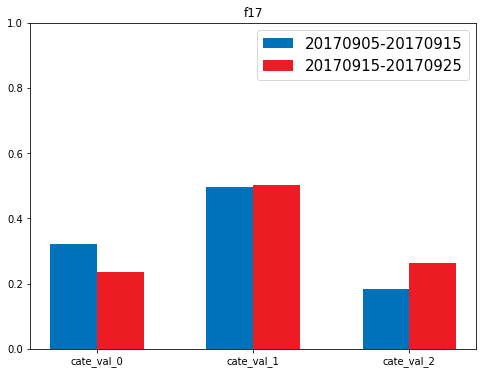

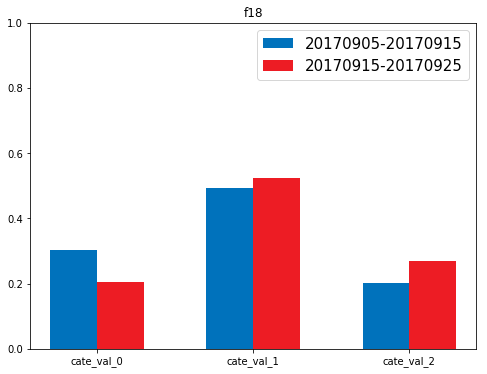

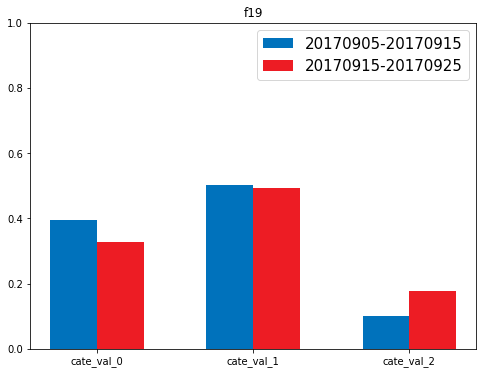

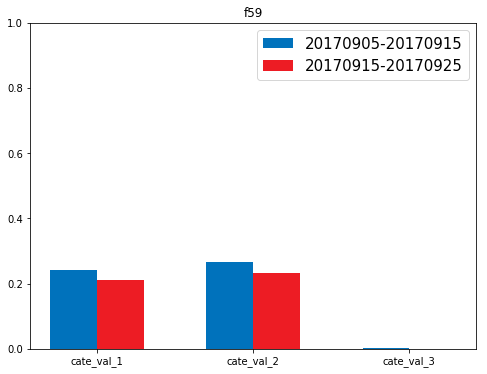

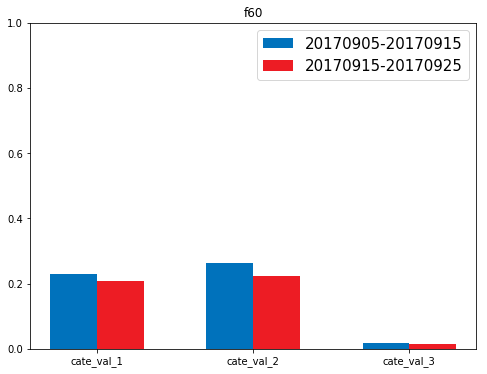

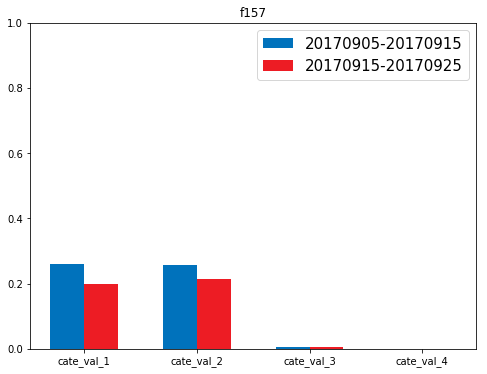

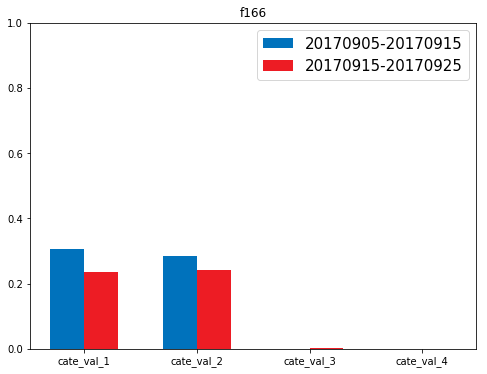

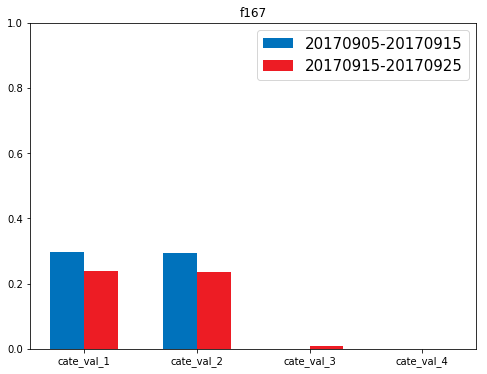

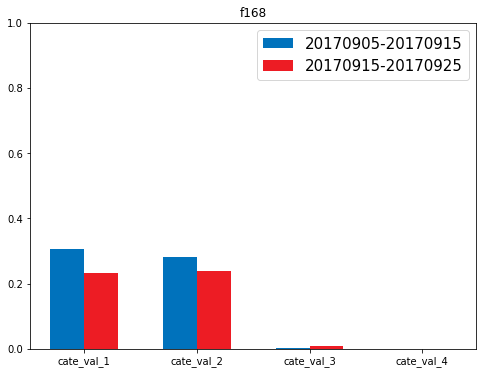

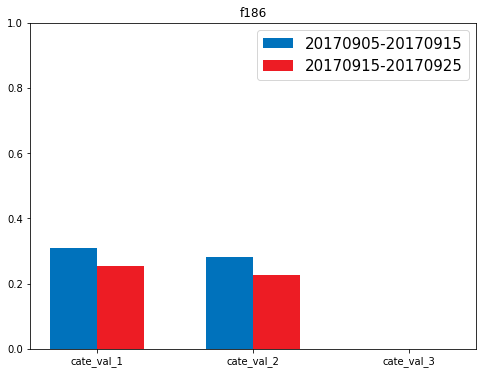

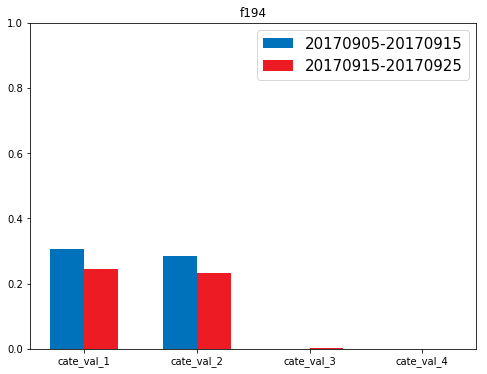

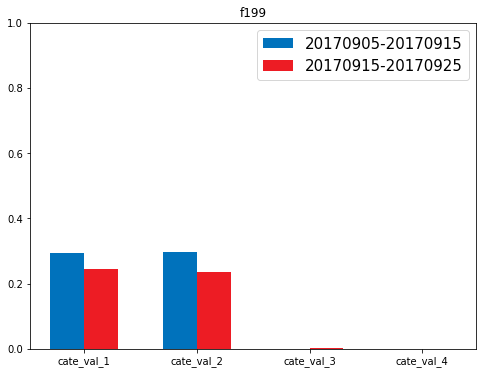

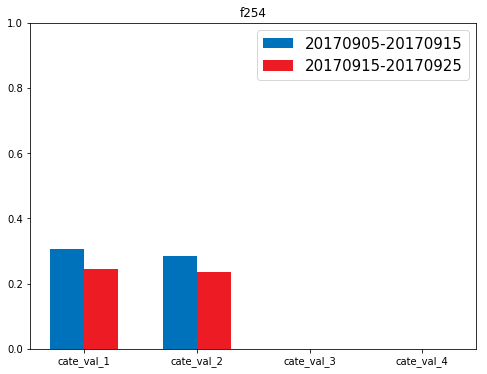

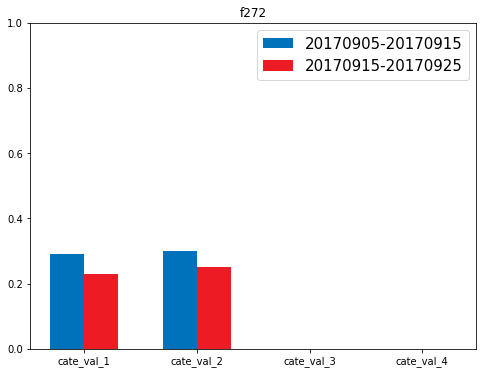

In [9]:
for i in cate_feat:
    cate_feat_analyze(data1, i, 20170915, 20170925)

取十天为一个界限，可以发现分布已经发生明显变化

In [15]:
print(data1[data1['date']<20170915].shape[0])
print(data1[(data1['date']>=20170915)&(data1['date']<20170925)].shape[0])

1611
1699


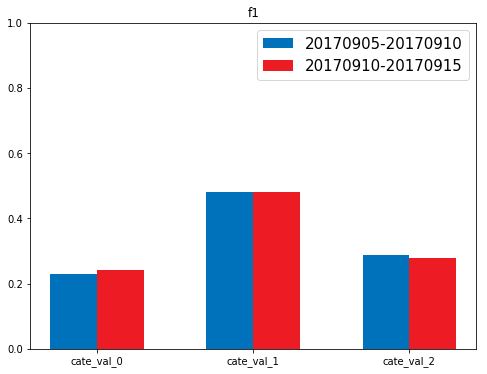

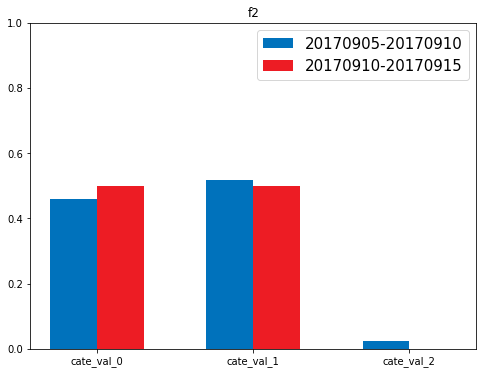

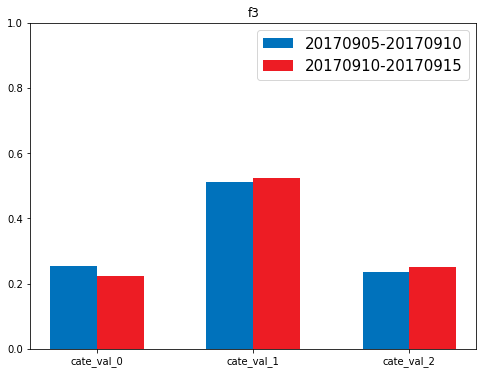

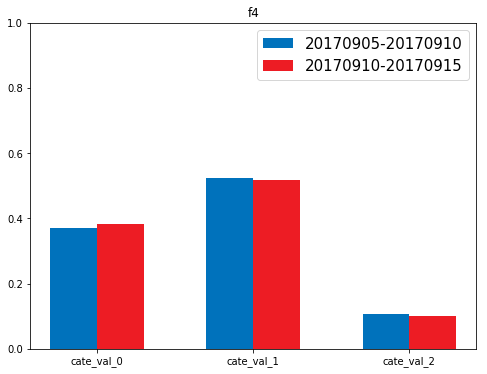

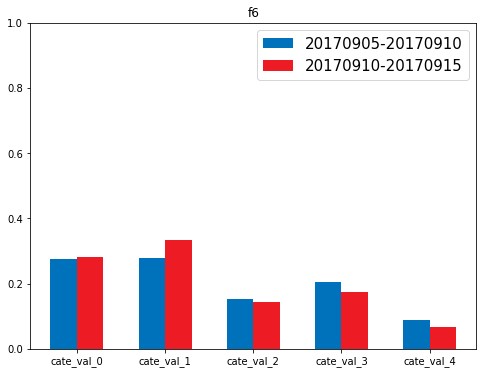

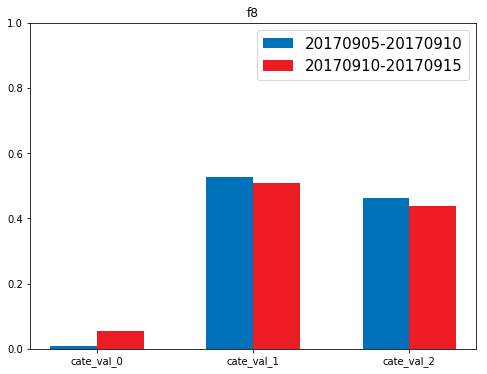

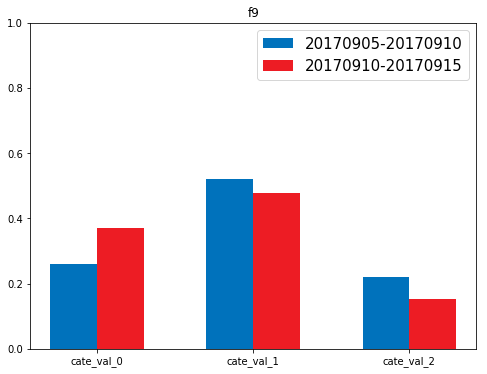

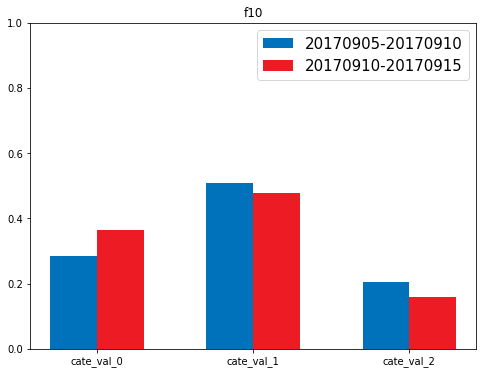

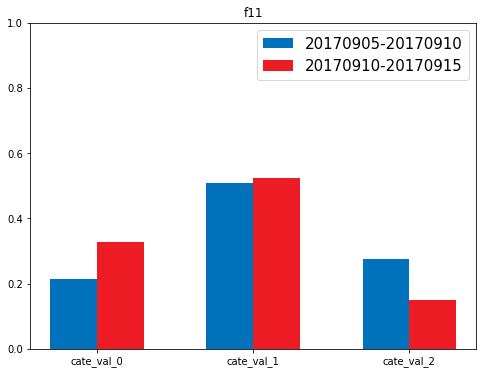

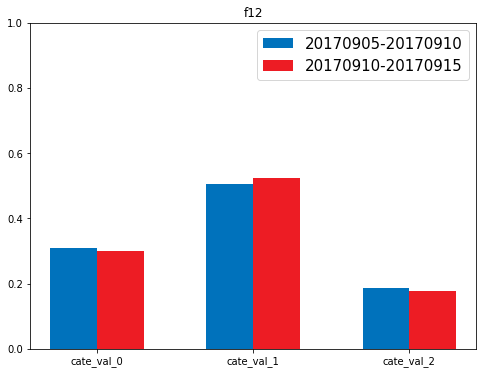

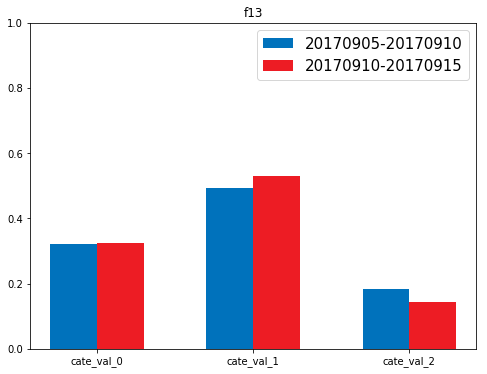

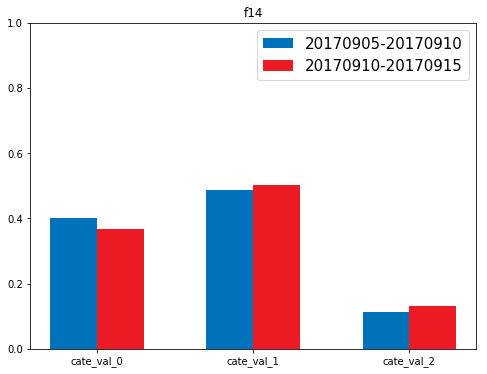

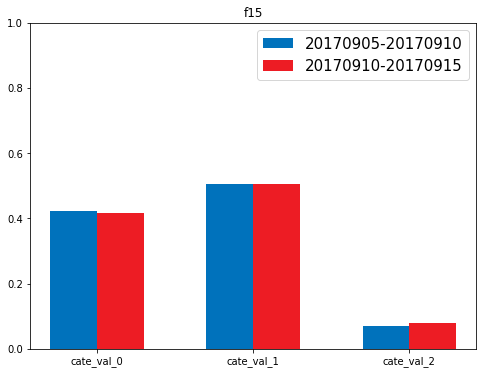

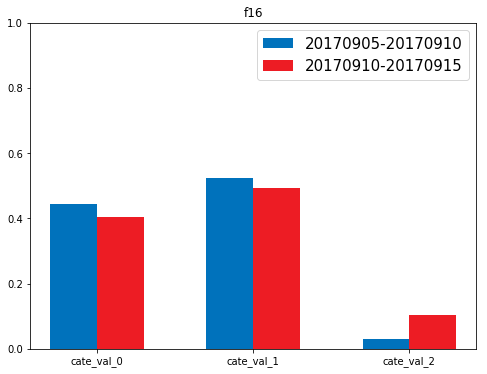

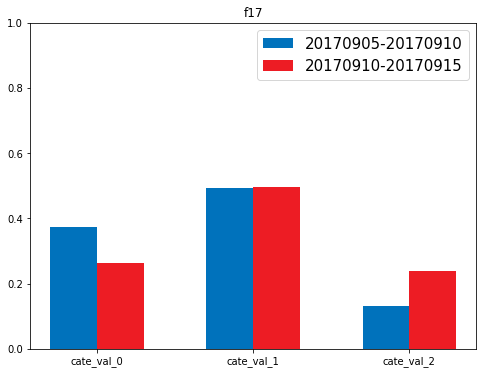

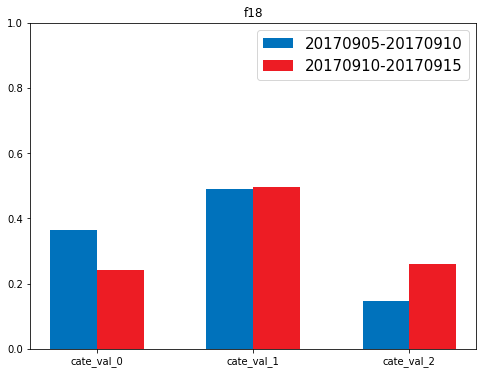

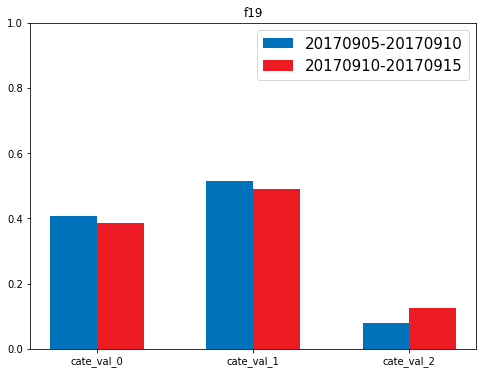

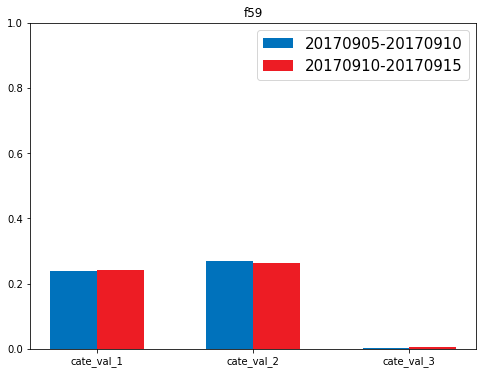

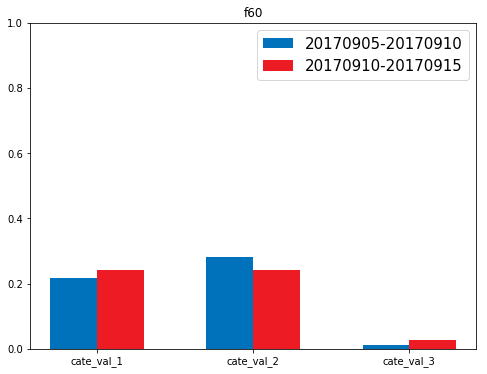

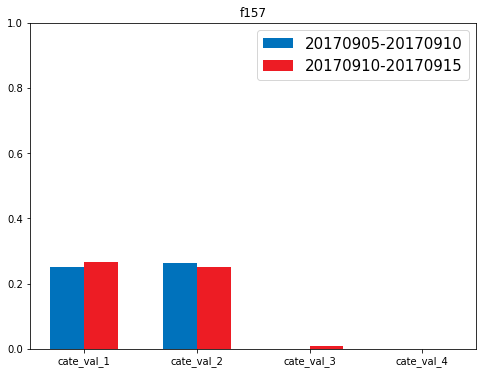

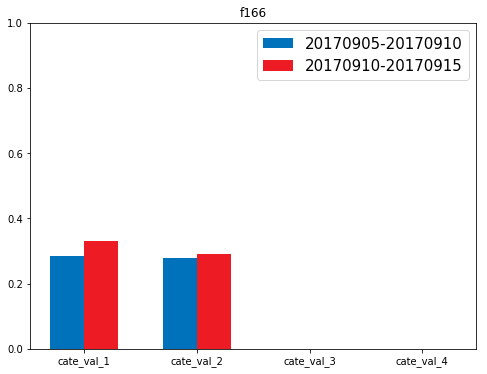

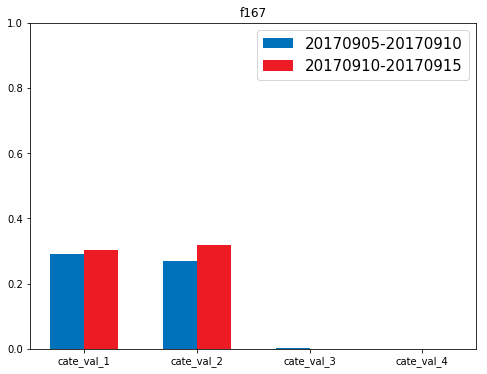

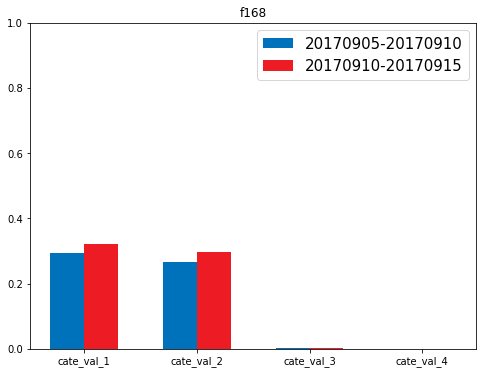

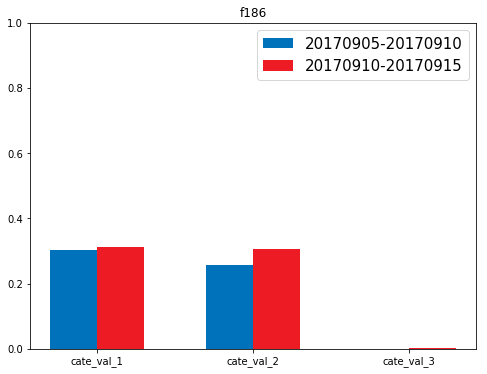

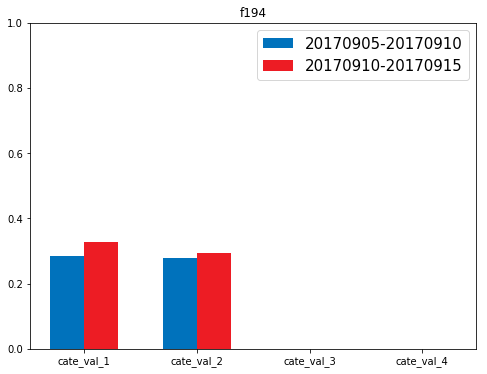

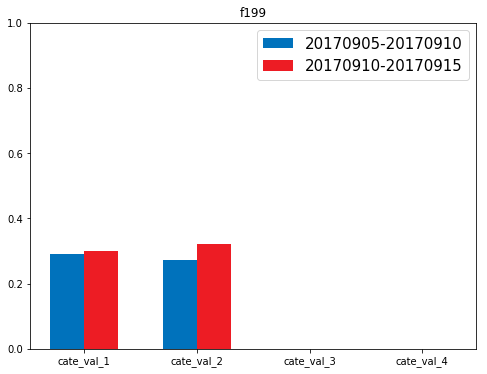

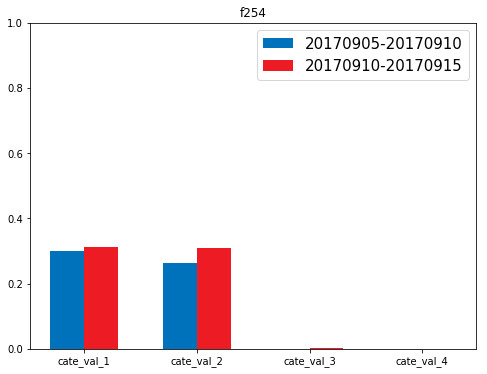

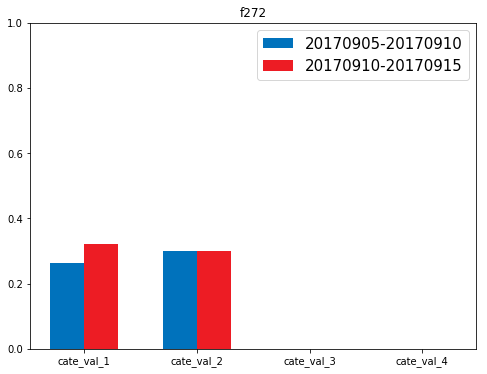

In [12]:
for i in cate_feat:
    cate_feat_analyze(data1, i, 20170910, 20170915)

In [14]:
print(data1[data1['date']<20170910].shape[0])
print(data1[(data1['date']>=20170910)&(data1['date']<20170915)].shape[0])

821
790


In [17]:
# 观察负样本分布有没有变化
data2 = data[data['label']==0]

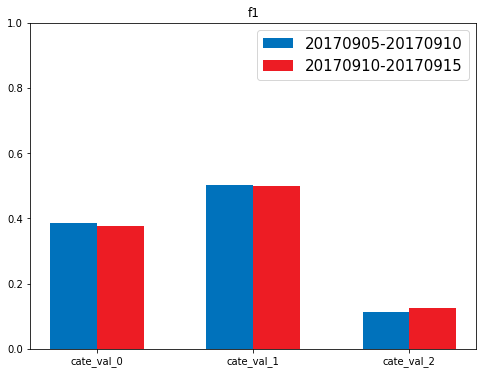

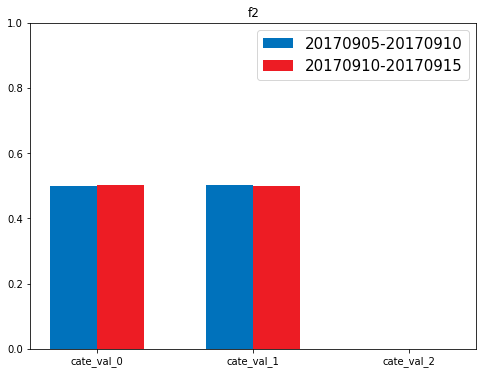

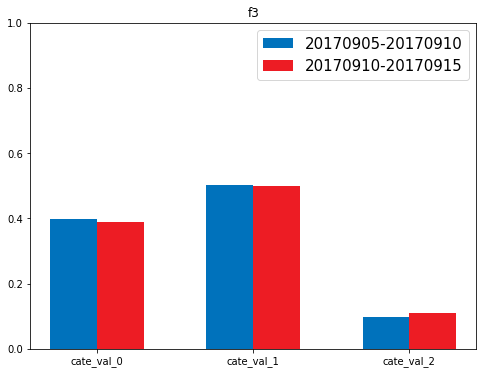

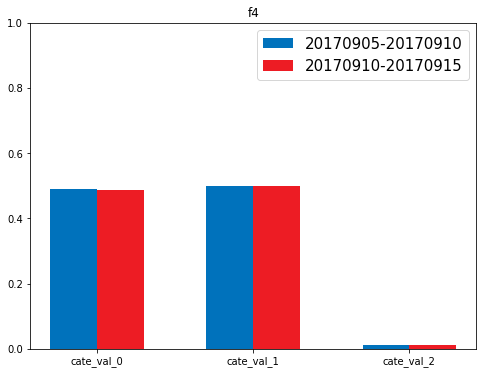

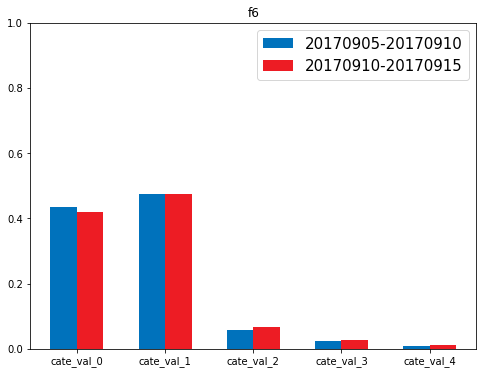

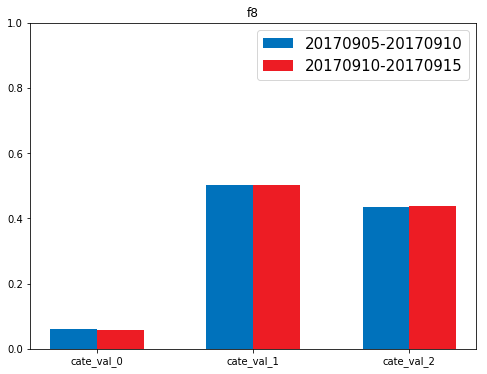

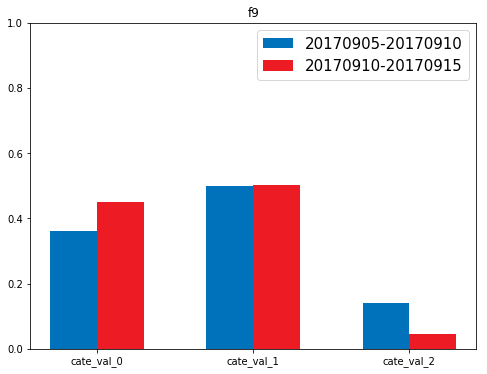

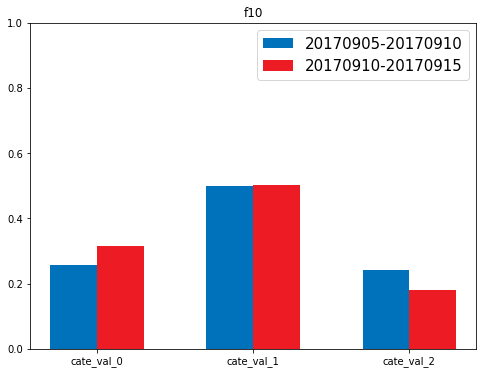

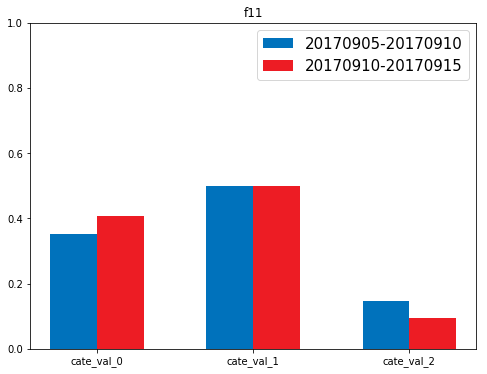

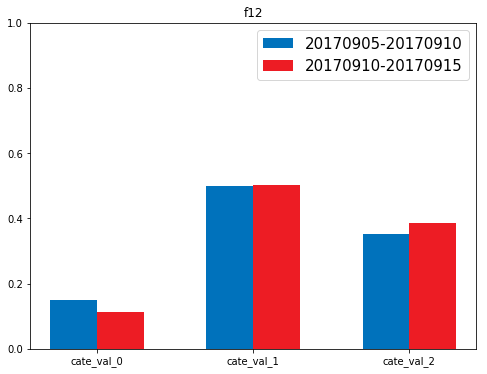

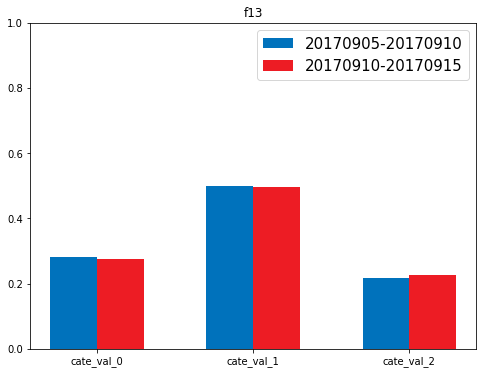

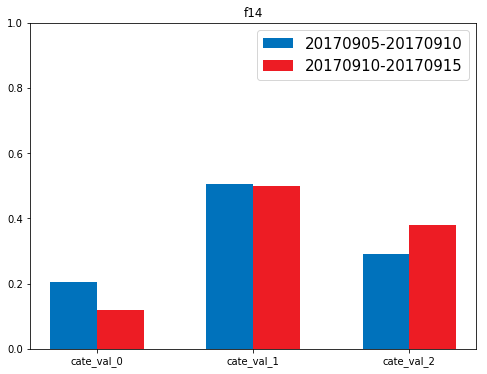

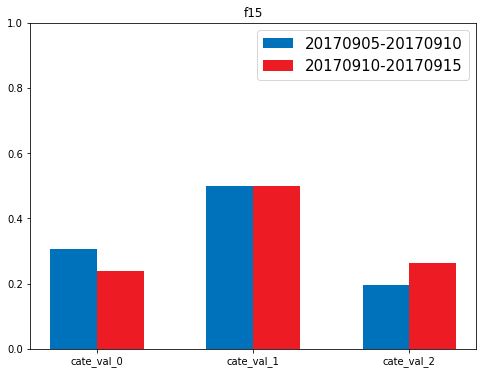

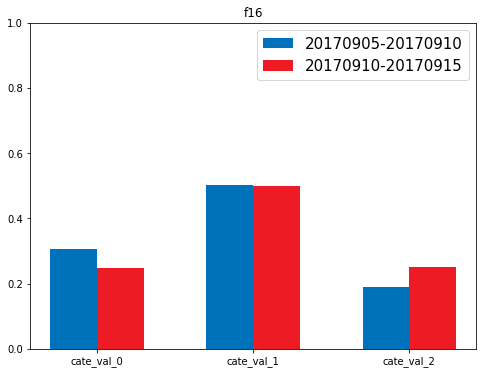

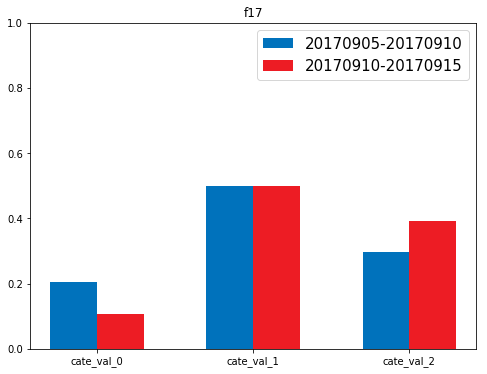

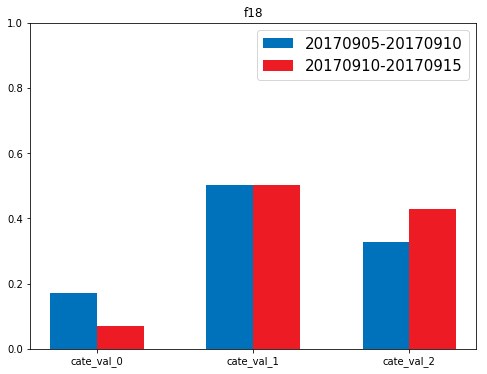

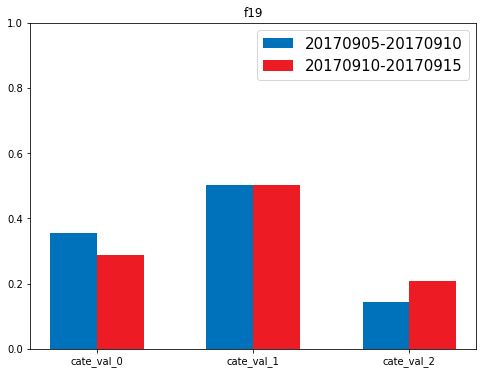

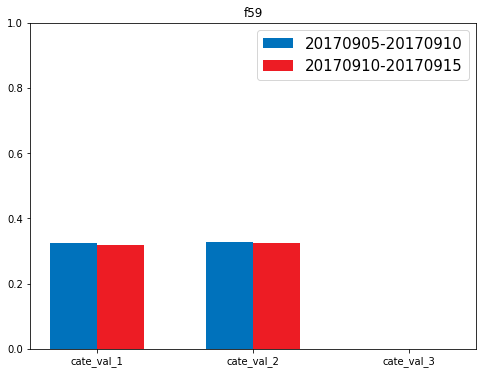

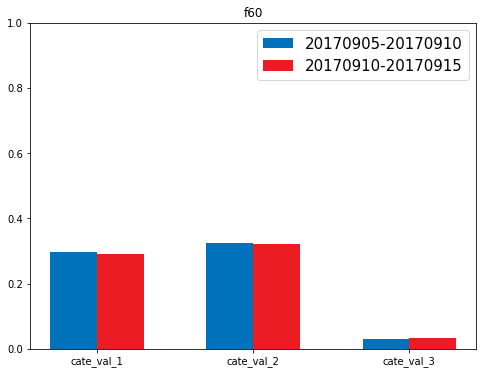

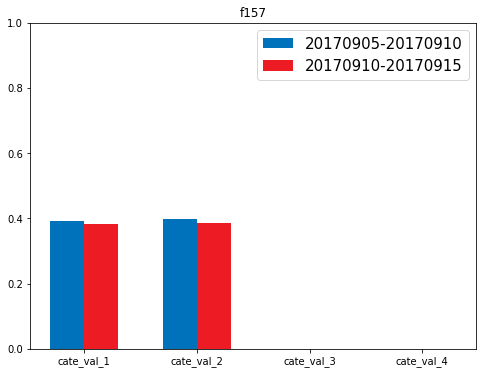

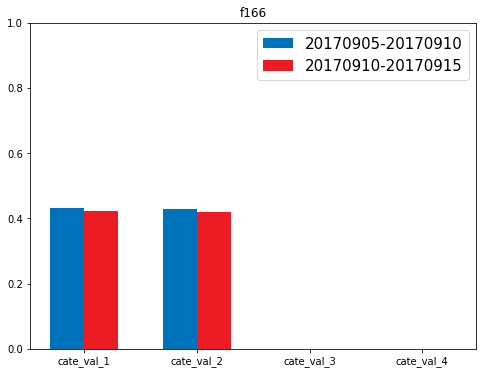

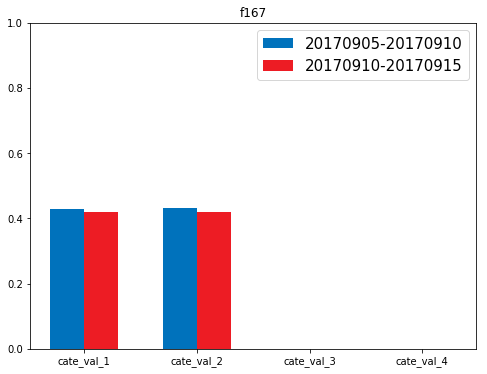

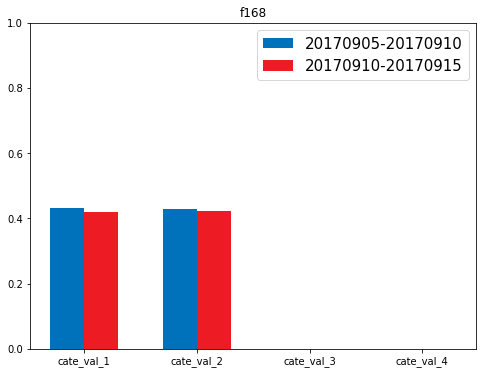

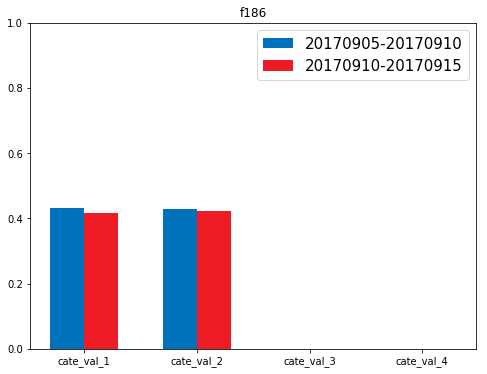

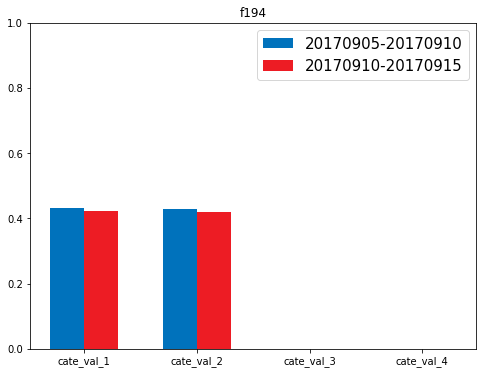

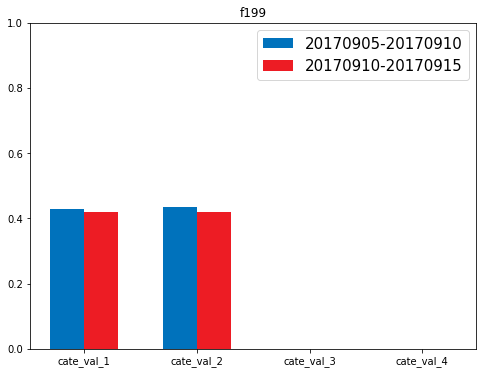

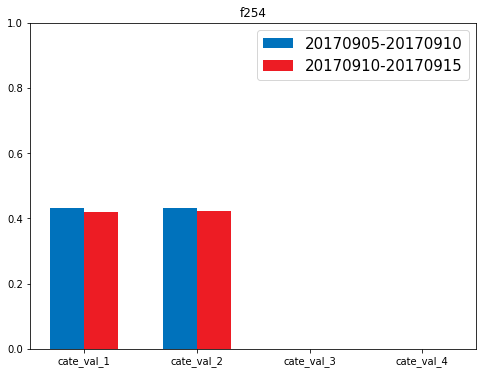

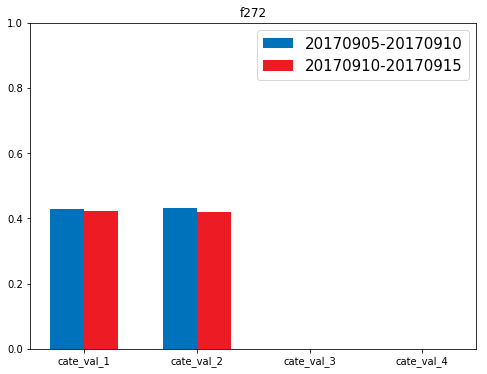

In [18]:
for i in cate_feat:
    cate_feat_analyze(data2, i, 20170910, 20170915)